In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("HRDataset_v14.csv") 

In [3]:
dataset.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
import pandas as pd

In [5]:
import numpy as np

In [7]:
# Moyenne
mean_value = dataset["Absences"].mean()

# Médiane
median_value = dataset["Absences"].median()

# Quartiles
Q1 = dataset["Absences"].quantile(0.25)  # 1er quartile (25%)
Q3 = dataset["Absences"].quantile(0.75)  # 3ème quartile (75%)

# Écart-type
std_dev = dataset["Absences"].std()

# IQR (Interquartile Range)
IQR = Q3 - Q1

# Affichage des résultats
print(f"Moyenne: {mean_value}")
print(f"Médiane: {median_value}")
print(f"1er Quartile (Q1): {Q1}")
print(f"3ème Quartile (Q3): {Q3}")
print(f"Écart-type: {std_dev}")
print(f"IQR (Écart interquartile): {IQR}")


Moyenne: 10.237942122186496
Médiane: 10.0
1er Quartile (Q1): 5.0
3ème Quartile (Q3): 15.0
Écart-type: 5.8525958627025645
IQR (Écart interquartile): 10.0


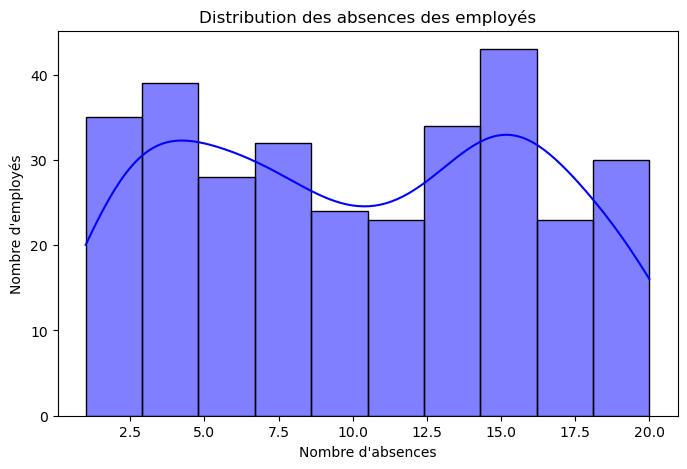

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("HRDataset_v14.csv")
plt.figure(figsize=(8, 5))
sns.histplot(dataset["Absences"], bins=10, kde=True, color="blue")
plt.title("Distribution des absences des employés")
plt.xlabel("Nombre d'absences")
plt.ylabel("Nombre d'employés")
plt.show()

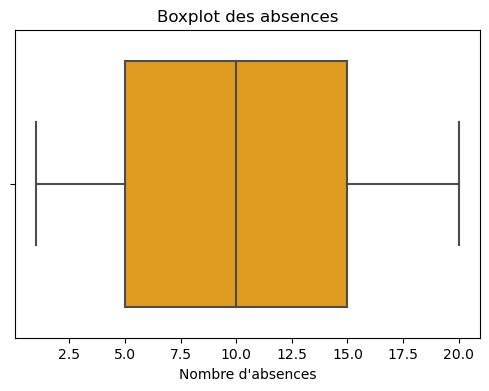

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=dataset["Absences"], color="orange")
plt.title("Boxplot des absences")
plt.xlabel("Nombre d'absences")
plt.show()

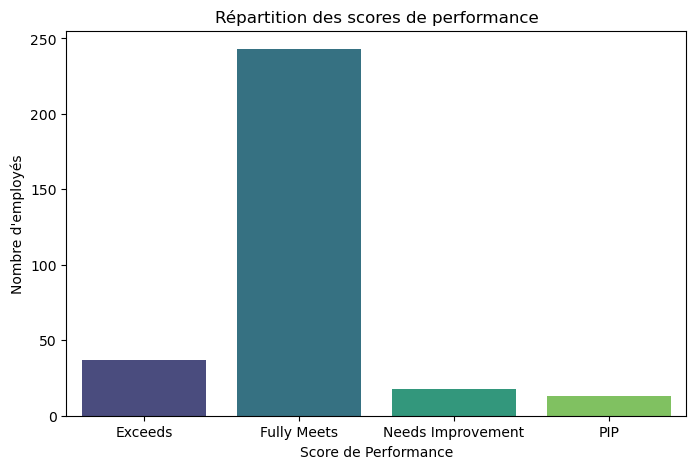

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x=dataset["PerformanceScore"], palette="viridis")
plt.title("Répartition des scores de performance")
plt.xlabel("Score de Performance")
plt.ylabel("Nombre d'employés")
plt.show()

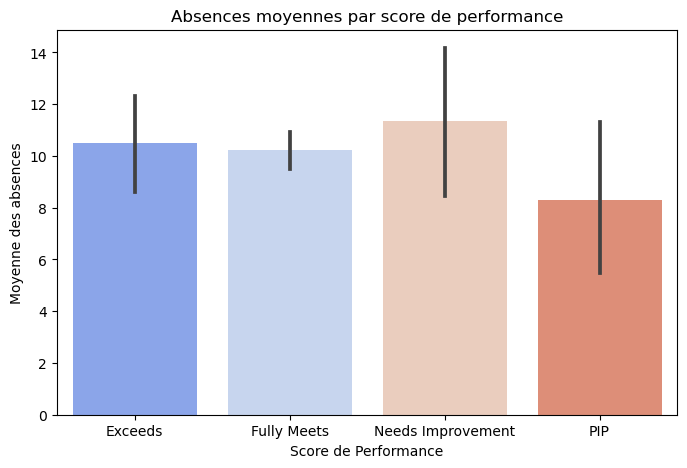

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x="PerformanceScore", y="Absences", data=dataset, palette="coolwarm")
plt.title("Absences moyennes par score de performance")
plt.xlabel("Score de Performance")
plt.ylabel("Moyenne des absences")
plt.show()

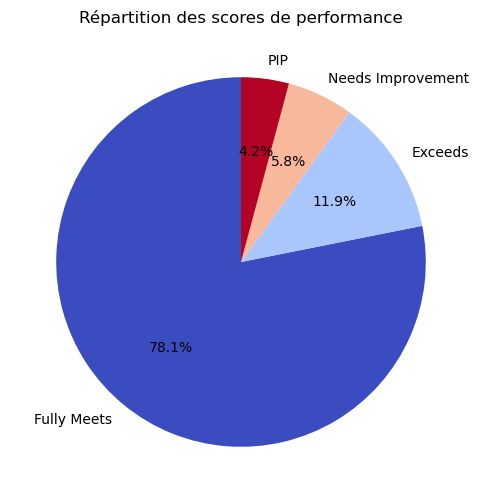

In [17]:
plt.figure(figsize=(6, 6))
dataset["PerformanceScore"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.title("Répartition des scores de performance")
plt.ylabel("")  # Cacher le label y
plt.show()

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("HRDataset_v14.csv") 
#  à analyser (ex: Absences)
column = "Absences"

# Calcul des quartiles
Q1 = dataset[column].quantile(0.25)  # 1er quartile (25%)
Q3 = dataset[column].quantile(0.75)  # 3ème quartile (75%)

# Calcul de l'IQR (Interquartile Range)
IQR = Q3 - Q1

# Définition des bornes pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]

# Affichage des outliers détectés
print("Valeurs aberrantes détectées :")
print(outliers[[column, "Employee_Name", "PerformanceScore"]])  # Ajouter d'autres colonnes si nécessaire

Valeurs aberrantes détectées :
Empty DataFrame
Columns: [Absences, Employee_Name, PerformanceScore]
Index: []


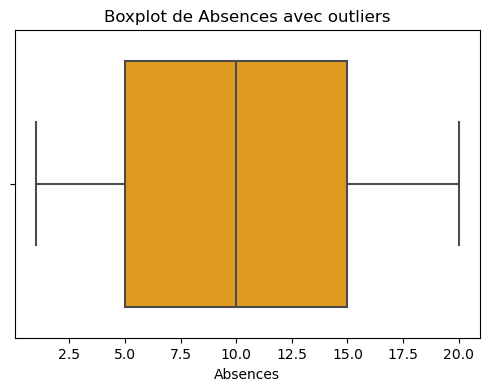

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=dataset[column], color="orange")
plt.title(f"Boxplot de {column} avec outliers")
plt.xlabel(column)
plt.show()

In [21]:

columns_to_check = ["Absences", "PerfScoreID"]  # les colonnes

for col in columns_to_check:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    print(f"\n Outliers pour {col}:")
    print(outliers[[col, "Employee_Name", "PerformanceScore"]])



 Outliers pour Absences:
Empty DataFrame
Columns: [Absences, Employee_Name, PerformanceScore]
Index: []

 Outliers pour PerfScoreID:
     PerfScoreID        Employee_Name   PerformanceScore
0              4  Adinolfi, Wilson  K            Exceeds
5              4    Anderson, Linda              Exceeds
12             4     Barbossa, Hector            Exceeds
16             4     Beak, Kimberly              Exceeds
22             4        Billis, Helen            Exceeds
..           ...                  ...                ...
293            4        Volk, Colleen            Exceeds
297            2     Wallace, Theresa  Needs Improvement
304            4   Winthrop, Jordan              Exceeds
307            1   Ybarra, Catherine                 PIP
308            4     Zamora, Jennifer            Exceeds

[68 rows x 3 columns]
